# MLP MNIST
Hier werden das erste Mal im MNIST nun Algotihmen aus dem 
Multilayer Perceptron (MLP) for multi-class softmax classification:

In [21]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [22]:
# Hier die Hyperparamter
batch_size = 128
num_classes = 10
epochs = 20

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
x_train = x_train.reshape(60000, 784) # MLP benötigt InputVektor
x_test = x_test.reshape(10000, 784) # MLP benötigt InputVektor
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # skalieren
x_test /= 255 # Skalieren
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [26]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) # hier der letzte Layer hat die Anzahl der möglichen klassen & die Softmax Aktivierung
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
#
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [28]:
# Ausführen des Modelles
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # show training progress during training Possible = 0,1,2
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2466 - accuracy: 0.9240 - val_loss: 0.1228 - val_accuracy: 0.9622
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1035 - accuracy: 0.9681 - val_loss: 0.1007 - val_accuracy: 0.9721
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0752 - accuracy: 0.9777 - val_loss: 0.0885 - val_accuracy: 0.9757
Epoch 4/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0808 - val_accuracy: 0.9777
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0699 - val_accuracy: 0.9809
Epoch 6/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.0697 - val_accuracy: 0.9841
Epoch 7/20
60000/60000 [==============================] 

In [35]:
# Save trained Model to disk via JSON
model_json = model.to_json()
with open("./Data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./Data/model.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12292145169656735
Test accuracy: 0.9829000234603882


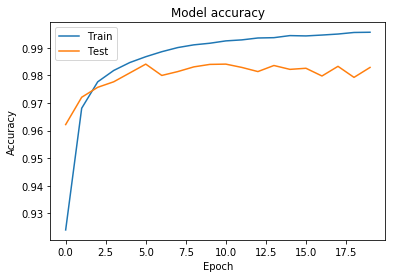

In [30]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

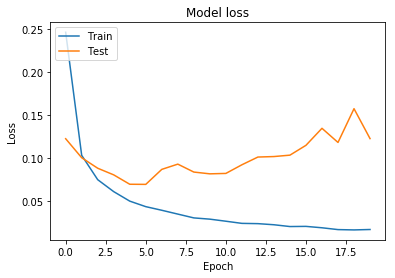

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

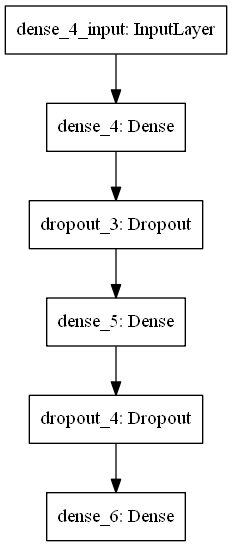

In [32]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)

In [33]:
from Keras.utils import plot_model 
plot_model(model, show_shapes=True, to_file='model.png')

ImportError: No module named 'Keras'